# Implementació de l'algorisme k-means des de zero

### Preparació de l'entorn

In [1]:
# Mòduls

import numpy as np
import random
from sklearn import cluster, datasets
import matplotlib.pyplot as plt

In [2]:
# Dataset

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Paràmetres

n_elements = X.shape[0]
n_attribs = X.shape[1]
k = y.max() + 1

### Algorisme

In [4]:
# Inicialització dels centroides

centroides = np.zeros((k, n_attribs))

# Tenim diferents maneres d'inicialitzar els centroides
metode = 3

# Centroides amb valors aleatoris per a cada atribut dins del seu rang
if metode==1:
    centroides = np.random.rand(k, n_attribs)
    for i in range(n_attribs):
        centroides[:,i] = centroides[:,i] * (X[:,i].max() - X[:,i].min()) + X[:,i].min()
        
# Centroides amb valors aleatoris per a cada atributs seguint una distribució normal
elif metode==2:
    centroides = np.random.randn(k, n_attribs)
    for i in range(n_attribs):
        centroides[:,i] = centroides[:,i] * X[:,i].std() + X[:,i].mean()

# Selecció aleatòria de k punts com a centroides
elif metode==3:
    for i in range(k):
        centroides[i,:] = X[np.random.randint(0,n_elements),:]

In [5]:
# Implementació de l'algorisme

# Declarem dos vectors per guardar els grups
grupAntic = np.zeros(n_elements, dtype=np.int)
grupNou = np.zeros(n_elements, dtype=np.int)

# Iteració
while True:
    # Assignem grup a cada element
    for element in range(n_elements):
        # El grup de cada element és el número del centroide més proper
        grupNou[element] = np.argmin(((centroides - X[element,:])**2).sum(axis=1))
       
    # Condició de sortida
    if all(grupAntic==grupNou):
        # si no hi ha canvis en els grups finalitzem l'algorisme
        break
    
    # Recalculem els centroides
    for i in range(k):
        # a cada centroide li assignem el valor mitjà dels elements del seu grup a cada atribut
        if (len(X[grupNou==i,])!=0):
            centroides[i,] = X[grupNou==i].mean(axis=0)

    # Copiem les dades en un altre vector per comparar l'evolució
    grupAntic = np.copy(grupNou)

### Visualització dels resultats

Text(0.5, 1.0, 'Implementació pròpia de k-means')

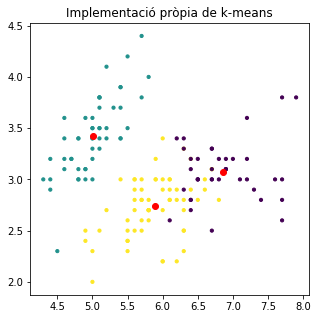

In [6]:
# Representem els grups de la implementació de k-means en un diagrama de punts

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.scatter(X[:,0], X[:,1], c=grupNou, s=10)
ax.scatter(centroides[:,0], centroides[:,1], c='red')  # Dibuixem els centroides
ax.set_title('Implementació pròpia de k-means')

### Comparació amb la implementació de sklearn

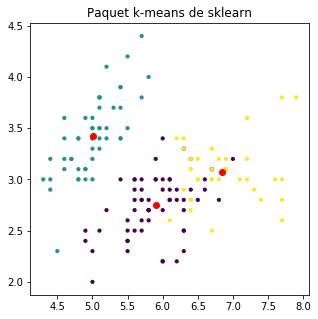

In [7]:
# Apliquem l'algorisme k-means de sklearn per comparar resultats
kmeans = cluster.KMeans(n_clusters=k).fit(X)

# Representem els resultats i els centroides
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_, s=10)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red')
ax.set_title('Paquet k-means de sklearn')

plt.show()

### Grups reals del dataset

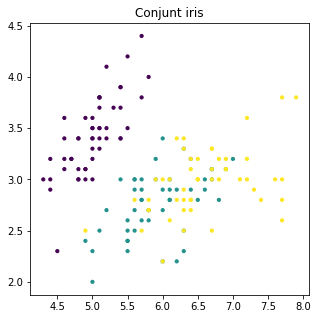

In [8]:
# Representem els grups reals del conjunt iris
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.scatter(X[:,0], X[:,1], c=y, s=10)
ax.set_title('Conjunt iris')

plt.show()